# Species List Intersections

Provide venn diagrams showing the overlap between different species lists

In [1]:
import pandas as pd
import matplotlib_venn
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('/bask/homes/f/fspo1218/amber/projects/gbif_download_standalone/species_checklists/singapore-moths-keys-nodup.csv')
df2 = pd.read_csv('/bask/homes/f/fspo1218/amber/projects/gbif_download_standalone/species_checklists/costarica-moths-keys-nodup.csv')
df3 = pd.read_csv('/bask/homes/f/fspo1218/amber/projects/gbif_download_standalone/species_checklists/uksi-moths-keys-nodup.csv')
df4 = pd.read_csv('/bask/homes/f/fspo1218/amber/projects/gbif_download_standalone/species_checklists/uksi-macro-moths-keys-nodup.csv')

In [3]:
df4 = df4.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df4.head()

,accepted_taxon_key,order_name,family_name,genus_name,species_name_provided,authority_name_provided,search_species_name,gbif_species_name,confidence,status,match_type,rank,source
0,5101394,Lepidoptera,Cossidae,Cossus,Cossus cossus,NaN,Cossus cossus,Cossus cossus,98,ACCEPTED,EXACT,SPECIES,Leeds22Nov2023
1,1777253,Lepidoptera,Noctuidae,Diloba,Diloba caeruleocephala,NaN,Diloba caeruleocephala,Diloba caeruleocephala,99,ACCEPTED,EXACT,SPECIES,Leeds22Nov2023
2,5108951,Lepidoptera,Erebidae,Diphthera,Diphthera festiva,NaN,Diphthera festiva,Diphthera festiva,99,ACCEPTED,EXACT,SPECIES,Leeds22Nov2023
3,1792768,Lepidoptera,Noctuidae,Dryobota,Dryobota labecula,NaN,Dryobota labecula,Dryobota labecula,99,ACCEPTED,EXACT,SPECIES,Leeds22Nov2023
4,1789267,Lepidoptera,Noctuidae,Dryobotodes,Dryobotodes eremita,NaN,Dryobotodes eremita,Dryobotodes eremita,99,ACCEPTED,EXACT,SPECIES,Leeds22Nov2023


In [4]:
df1.shape

(1275, 13)

In [5]:
from venny4py.venny4py import *

In [6]:
df4.shape

(993, 13)

In [7]:
sets = {
    'Singapore': set(df1['gbif_species_name']),
    'Costa Rica': set(df2['gbif_species_name']),
    'UK': set(df3['gbif_species_name']),
    #'UK macro': set(df4['gbif_species_name'])
    }

In [8]:
from itertools import combinations
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse

#plot Venn: need to intercept to pass in label colour and transparency
def venny4py2(sets={}, out='./', asax=False, ext='png', dpi=300, size=3.5, label_color='black'):
    shared = get_shared(sets)
    unique = get_unique(shared)
    ce = 'bgrc' #colors
    lw = size*.12 #line width
    fs = size*2 #font size
    nc = 2 #legend cols
    cs = 4 #columnspacing

    with open(f'{out}/Intersections_{len(sets)}.txt', 'w') as f:
        for k, v in unique.items():
            f.write(f'{k}: {len(v)}, {sorted(list(v))}\n')

    if asax == False:
        plt.rcParams['figure.dpi'] = 200 #dpi in notebook
        plt.rcParams['savefig.dpi'] = dpi #dpi in saved figure
        fig, ax = plt.subplots(1, 1, figsize=(size, size))

    else:
        ax = asax

    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.axis('off')

    #4 sets
    if len(sets) == 4:
        #draw ellipses
        ew = 45 #width
        eh = 75 #height
        xe = [35, 48, 52, 65] #x coordinats
        ye = [35, 45, 45, 35] #y coordinats
        ae = [225, 225, 315, 315] #angles

        for i, s in enumerate(sets):
            ax.add_artist(Ellipse(xy=(xe[i], ye[i]), width=ew, height=eh, fc=ce[i],
                                  angle=ae[i], alpha=.3))
            ax.add_artist(Ellipse(xy=(xe[i], ye[i]), width=ew, height=eh, fc='None',
                                  angle=ae[i], ec=label_color, lw=lw))

        #annotate
        xt = [12, 32, 68, 88, 14, 34, 66, 86, 26, 28, 50, 50, 72, 74, 37, 60, 40, 63, 50] #x
        yt = [67, 79, 79, 67, 41, 70, 70, 41, 59, 26, 11, 60, 26, 59, 51, 17, 17, 51, 35] #y

        for j, s in enumerate(sets):
            ax.text(xt[j], yt[j], len(sets[s]), ha='center', va='center', fontsize=fs,
                    color=label_color, transform=ax.transData)

        for k in unique:
            j += 1
            ax.text(xt[j], yt[j], len(unique[k]), ha='center', va='center', fontsize=fs,
                    color=label_color, transform=ax.transData)

    #3 sets
    if len(sets) == 3:
        #draw circles
        ew = 60 #width
        eh = 60 #height
        lw = size*.12 #line width
        xe = [37, 63, 50] #x coordinats
        ye = [55, 55, 32] #y coordinats
        nc = 3 #legend columns
        cs = 1 #columns spacing

        for i, s in enumerate(sets):
            ax.add_artist(Ellipse(xy=(xe[i], ye[i]), width=ew, height=eh, fc=ce[i],
                                  angle=0, alpha=.3))
            ax.add_artist(Ellipse(xy=(xe[i], ye[i]), width=ew, height=eh, fc='None',
                                  angle=0, ec=label_color, lw=lw))

        #annotate
        xt = [12, 88, 28, 22, 78, 50, 50, 30, 70, 50] #x
        yt = [80, 80,  3, 60, 60, 17, 70, 35, 35, 50] #y


        for j, s in enumerate(sets):
            ax.text(xt[j], yt[j], len(sets[s]), ha='center', va='center',
                    fontsize=fs, color=label_color,
                    transform=ax.transData)

        for k in unique:
            j += 1
            ax.text(xt[j], yt[j], len(unique[k]), ha='center', va='center',
                    fontsize=fs, color=label_color,
                    transform=ax.transData)

    #2 sets
    if len(sets) == 2:
        #draw circles
        ew = 70 #width
        eh = 70 #height
        lw = size*.12 #line width
        xe = [37, 63] #x coordinats
        ye = [45, 45] #y coordinats

        for i, s in enumerate(sets):
            ax.add_artist(Ellipse(xy=(xe[i], ye[i]), width=ew, height=eh, fc=ce[i],
                                  angle=0, alpha=.3))
            ax.add_artist(Ellipse(xy=(xe[i], ye[i]), width=ew, height=eh, fc='None',
                                  angle=0, ec=label_color, lw=lw))

        #annotate
        xt = [20, 80, 18, 82, 50] #x
        yt = [80, 80, 45, 45, 45] #y

        for j, s in enumerate(sets):
            ax.text(xt[j], yt[j], len(sets[s]), ha='center', va='center', fontsize=fs,
                    color=label_color,transform=ax.transData)

        for k in unique:
            j += 1
            ax.text(xt[j], yt[j], len(unique[k]), ha='center', va='center', fontsize=fs,
                    color=label_color,transform=ax.transData)

    #legend
    handles = [mpatches.Patch(color=ce[i], label=l, alpha=.3) for i, l in enumerate(sets)]
    ax.legend(labels=sets, handles=handles, fontsize=fs*1.1, frameon=False,
              labelcolor='white',
              bbox_to_anchor=(.5, .99), bbox_transform=ax.transAxes, loc=9,
              handlelength=1.5, ncol=nc, columnspacing=cs, handletextpad=.5)
    if asax == False:
        print(f'Saving {out}/Venn_{len(sets)}.{ext}')
        fig.savefig(f'{out}/Venn_{len(sets)}.{ext}',
                    bbox_inches='tight', transparent=True
                    )

Saving ./plots/Venn_3.png


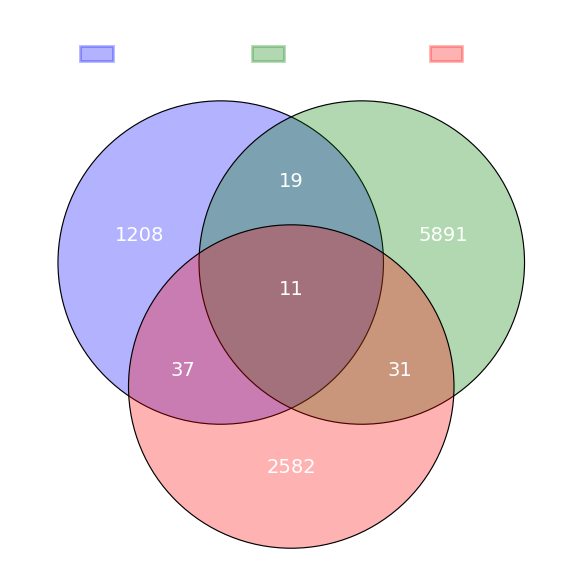

In [9]:
# set matplotlib background as transparent

# Define the labels for each set
venny4py2(sets=sets, out="./plots", label_color='white')

In [ ]:
sets['UK macro'] - sets['UK']

Which species are the ones common to all 3 regions (drop macro)?

In [ ]:
# sets common to UK, Costa Rica and Singapore
common_species = list(sets['UK'] & sets['Costa Rica'] & sets['Singapore'])
common_species

In [ ]:
# list the images files within ~/amber/data/gbif_download_standalone/
import os
all_files = os.listdir('/bask/homes/f/fspo1218/amber/data/gbif_download_standalone/gbif_images')

# list all files in the directory strucure
all_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk('/bask/homes/f/fspo1218/amber/data/gbif_download_standalone/gbif_images') for f in filenames]


# filter the list of files to only include those that contain common species
common_files = [f for f in all_files if any(x in f for x in common_species)]

print(len(common_files))

In [ ]:
common_files[0:10]

In [ ]:
# print the image of the first file
from IPython.display import Image
Image(filename=common_files[0])

In [ ]:
# select 20 random images from common files
import random
random.seed(42)
random_files = random.sample(common_files, 20)

os.makedirs('/bask/homes/f/fspo1218/amber/projects/gbif_download_standalone/common_species/', exist_ok=True)

# make a copy of the random files to the dir, save with the name of the species
for f in random_files:
    species = [x for x in common_species if x in f][0]
    #print(species)

    image_name = os.path.basename(f)
    #print(image_name)

    save_name = '/bask/homes/f/fspo1218/amber/projects/gbif_download_standalone/common_species/{}_{}'.format(species, image_name)

    # replace whitespace with underscore
    save_name = save_name.replace(' ', '_')
    print(save_name)

    # copy the file to the new location
    shutil.copyfile(f, save_name)


In [ ]:
# create a dir ~/amber/projects/gbif_download_standalone/common_species/


# make a copy of the common files list to
import shutil
for f in common_files:
    shutil.copy(f, '/bask/homes/f/fspo1218/amber/projects/gbif_download_standalone/common_species/')
